In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

Read Train data into a DataFrame

In [2]:
train_csv_file = "isl_wise_train_detail_03082015_v1.csv"
trains_df = pd.read_csv(train_csv_file)

Checking if the dataframe is loaded 

In [3]:
trains_df.sample(5)

,Train No.,train Name,islno,station Code,Station Name,Arrival time,Departure time,Distance,Source Station Code,source Station Name,Destination station Code,Destination Station Name
57227,'22632',ANUVRAT EXP,21,CD,CHANDRAPUR,'19:01:00','19:03:00',1670,BKN,BIKANER JN,MAS,CHENNAI CENTRAL
67525,'59076',BSL ST BCT PASS,30,BCT,MUMBAI CENTRAL,'04:35:00','00:00:00',598,BSL,BHUSAVAL JN,ST,SURAT
38874,'16350',RAJYA RANI EXP,10,TCR,THRISUR,'00:07:00','00:10:00',99,NIL,NILAMBUR ROAD,TVC,TRIVANDRUM CNTL
14430,'12550',JAT DURG SF EXP,16,BYT,BHATAPARA,'12:11:00','12:13:00',1772,JAT,JAMMU TAWI,DURG,DURG
40002,'16562',KCVL YPR AC EXP,15,BAND,BANASWADI,'04:20:00','04:21:00',845,KCVL,KOCHUVELI,YPR,YESVANTPUR JN


In [4]:
trains_df.shape

(69006, 12)

Cleaning up data and converting formats for easier manipulation

In [5]:
def df_perform_action(df, cols, action):
    '''
    (df, cols, action) -> None
    Helper function that takes a DataFrame, cols list and performs
    the action specified
    '''
    for col in cols:
        df[col] = action(df, col)

# Remove the quotes around the string for the following cols
df_perform_action(
    trains_df, 
    ['Train No.', 'Arrival time','Departure time'], 
    lambda x,y:x[y].str.strip("'")
)

In [6]:
# Change the format to date time
# Convert the columns with time into datetime
df_perform_action(
    trains_df, 
    ['Arrival time','Departure time'], 
    lambda x,y:pd.to_datetime(x[y])
)

In [7]:
# Rename all the columns by replacing whitespace with '-' and stripping non-alphanumeric chars
col_names = trains_df.columns.tolist()
trains_df.columns = [col_name.lower().strip('\'.').replace(' ','-') for col_name in col_names]

In [8]:
trains_df.sample(5)

,train-no,train-name,islno,station-code,station-name,arrival-time,departure-time,distance,source-station-code,source-station-name,destination-station-code,destination-station-name
53531,19417,ADI ALD EXPRESS,8,AN,AMALNER,2016-06-27 23:02:00,2016-06-27 23:05:00,485,ADI,AHMEDABAD JN,ALD,ALLAHABAD JN
58615,22826,MAS SHM EXP,20,BLS,BALASORE,2016-06-27 17:30:00,2016-06-27 17:32:00,1429,MAS,CHENNAI CENTRAL,SHM,SHALIMAR
15347,12617,MANGALA LDWEEP,4,SRR,SHORANUR JN,2016-06-27 13:00:00,2016-06-27 13:05:00,107,ERS,ERNAKULAM JN,NZM,H NIZAMUDDIN
51784,19131,KUTCH EXPRESS,9,BRC,VADODARA JN,2016-06-27 23:40:00,2016-06-27 23:45:00,381,BDTS,BANDRA TERMINUS,BHUJ,BHUJ
28893,14258,KASHI V EXPRESS,11,BE,BAREILLY,2016-06-27 16:45:00,2016-06-27 16:50:00,258,NDLS,NEW DELHI,BSB,VARANASI JN


Data analysis part

In [9]:
"Total number of trains - %d" % len(trains_df['train-no'].unique())

'Total number of trains - 2810'

In [10]:
"Total number of Stations - %d" % len(trains_df['station-code'].unique())

'Total number of Stations - 4344'

In [11]:
# Distance travelled by all the trains in descending order
train_distances_df = trains_df[['train-no','train-name','distance', 'source-station-name', 'destination-station-name']] \
    .groupby(['train-no', 'train-name', 'source-station-name', 'destination-station-name']) \
    .sum() \
    .sort_values('distance' ,ascending=False).reset_index()
train_distances_df.head()

,train-no,train-name,source-station-name,destination-station-name,distance
0,16318,HIMSAGAR EXP,JAMMU TAWI,KANYAKUMARI,155675
1,15909,ABADH ASSAM EXP,NEW TINSUKIA JN,LALGARH JN,153688
2,13352,DHANBAD EXPRESS,ALLEPPEY,DHANBAD JN,149676
3,15906,VIVEK EXPRESS,DIBRUGARH,KANYAKUMARI,141633
4,16317,HIMSAGAR EXP,KANYAKUMARI,JAMMU TAWI,140642


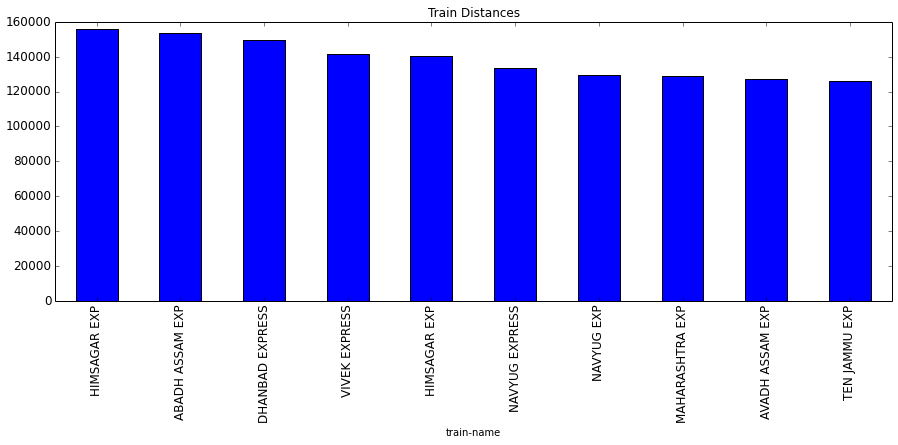

In [12]:
t_df = train_distances_df[['train-name', 'distance']].head(10)
s = pd.Series(t_df['distance'].tolist(), index=t_df['train-name'])

s.plot(
        kind='bar', 
        title ="Train Distances",
        figsize=(15,5),
        legend=False, 
        fontsize=12
    )

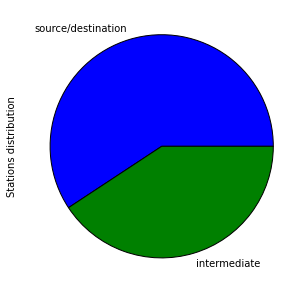

In [13]:
# Percentage of stations that are source/destination vs strictly intermediate
src_dest_station_codes = list(set(trains_df['source-station-code'].tolist() + trains_df['destination-station-code'].tolist()))
all_station_codes = trains_df['station-code'].tolist()
intermediate_station_codes = [i for i in all_station_codes if i not in src_dest_station_codes]

s = pd.Series(
    [len(all_station_codes), len(intermediate_station_codes)], 
    index=['source/destination', 'intermediate'],
    name="Stations distribution"
)
s.plot.pie(figsize=(5, 5))

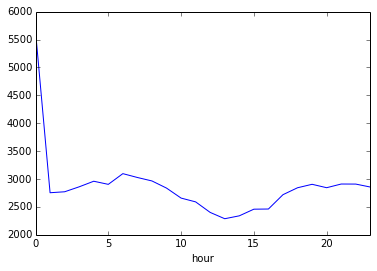

In [76]:
# Distribution of trains arriving at times throughout the day
arriving_hour = pd.DataFrame({"hour" : trains_df['arrival-time'].dt.hour})
arriving_agg = arriving_hour.groupby("hour").size()
arriving_agg.plot()